In [3]:
# load necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.random.seed(1)
%matplotlib inline

# get data
df = pd.read_csv('../../Ex03/Exercise3/DiabetesDataset.csv')
# keep the patient characteristics as inputs X and the diabetes as target y
X = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# check out the size of the training and test datasets
print ("Training Set Size:", len(X_train))
print ("Test Set Size:", len(X_test))

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print ("Training Set Size:", len(X_train_val))
print ("Validation Set Size:", len(X_val))
print ("Test Set Size:", len(X_test))

Training Set Size: 691
Test Set Size: 77
Training Set Size: 552
Validation Set Size: 139
Test Set Size: 77


### Find optimal k using the validation data set

#### For-Loop - Fit every k 

In [4]:
scores = []

for k in range(1,101):
    knn_validation = KNeighborsClassifier(n_neighbors=k).fit(X_train_val,y_train_val)
    prediction = knn_validation.predict(X_val)
    accuracy = knn_validation.score(X_val, y_val)
    scores.append(accuracy)


#### Find best k in scores

In [7]:
best_score = max(scores)
best_k = scores.index(best_score) + 1 # +1 as index starts at 0

#### Plot the scores

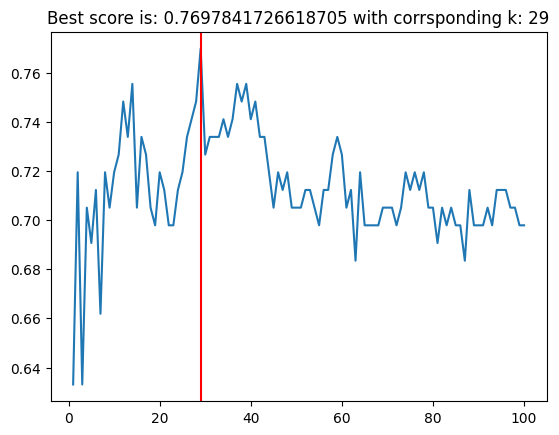

In [8]:
title = (f'Best score is: {best_score} with corrsponding k: {best_k}')

plt.plot(range(1,101),scores)
plt.title(title)
plt.axvline(x=best_k, c='r')
plt.show()

### Train final Classiefier with optimal k

#### 1. fit the best k

In [10]:
knn_validation_training_fit = KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)


#### 2. Compute prediction on test data

In [11]:
prediction_test = knn_validation_training_fit.predict(X_test)

#### 3. Compute accuracy on test data

In [12]:
accuracy_test = knn_validation_training_fit.score(X_test, y_test)

#### 4. Display Confusion Matrix for test set

<AxesSubplot: >

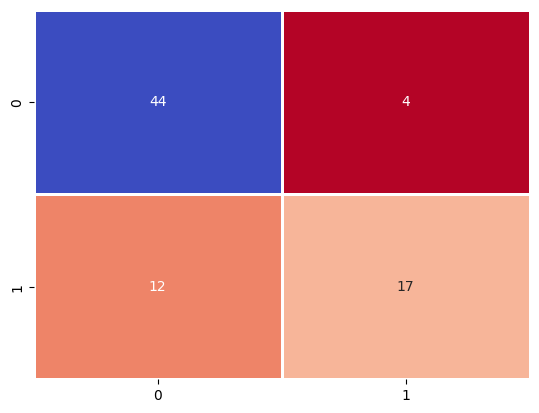

In [9]:
confusion_matrix = confusion_matrix(y_test, prediction_test)

sns.heatmap(confusion_matrix,
            annot=True, 
            fmt='d', 
            cbar=False, 
            cmap="coolwarm_r",  
            linewidth=1)